In [3]:
import opendatasets as od
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download'

In [5]:
import os 

path = './ccdata'
os.listdir(path)

['CC GENERAL.csv', '.ipynb_checkpoints']

In [6]:
train_csv = path + '/CC GENERAL.csv'
ccd = pd.read_csv(train_csv)


### Preparing the data

In [7]:
# remove the credit limit 1 null value
ccd[ccd['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [8]:
# removed the row which contains the Nan Value
ccd.drop([5203], axis=0,inplace=True)

In [9]:
ccd.reset_index(inplace=True)


In [10]:
ccd.drop('index', axis=1, inplace=True)


In [11]:
# 313 null values
print(ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull())].shape[0])

# now there is another field that contains missing values which we shall input
# we can see we have 313 rows that are empty
# now we want to imput those rows
print(ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] == 0)].shape[0])

313
240


In [12]:
payments_mean = np.mean(ccd['PAYMENTS'])
print(payments_mean)

1733.3365108509329


In [14]:
# we have payments that are less than the mean, so it does make any sense to 
# impute the values of the empty columns[NaN columns] with the mean directly
# if the payments < payments_mean then use the values of the payments to impute -->
# --> the missing columns 

print(ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] < payments_mean) &  (ccd['PAYMENTS'] > 0)].shape[0])


65


In [15]:
# is the payments > 0 and payments > mean
# then use the value of the mean to impute the missing value  
print(ccd[['PAYMENTS','MINIMUM_PAYMENTS']][(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] > payments_mean) & (ccd['PAYMENTS'] > 0)].shape[0])


8


In [16]:
# ccd.loc[(condition), 'column'] 
# 1st condition done
ccd.loc[(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] == 0), 'MINIMUM_PAYMENTS'] = 0

# 2nd condition done
ccd.loc[(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] < payments_mean) & (ccd['PAYMENTS'] > 0), 'MINIMUM_PAYMENTS'] = ccd['PAYMENTS']

# 3rd condition done
ccd.loc[(ccd['MINIMUM_PAYMENTS'].isnull()) & (ccd['PAYMENTS'] > payments_mean) & (ccd['PAYMENTS'] > 0), 'MINIMUM_PAYMENTS'] = payments_mean



In [17]:
# check the data 
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [18]:
# we need to drop the ID's of the users
ccd = ccd.drop('CUST_ID',axis=1)


### RANDOM SELECTION OF THE COLUMNS

In [41]:
ccd_df = ccd.copy()
input_columns = list(ccd_df.columns[:-1])
y_column = list(ccd_df.columns[-1:])
selected_input_columns = random.sample(input_columns,k=int(len(input_columns)*0.80))

In [42]:
print(len(selected_input_columns))
print(len(input_columns))

12
16


In [43]:
print(y_column)

['TENURE']


In [44]:
ccd_df[selected_input_columns]

,CASH_ADVANCE_TRX,ONEOFF_PURCHASES,MINIMUM_PAYMENTS,BALANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_TRX
0,0,0.00,139.509787,40.900749,0.000000,1000.0,201.802084,0.000000,0.166667,0.818182,95.40,2
1,4,0.00,1072.340217,3202.467416,0.250000,7000.0,4103.032597,0.000000,0.000000,0.909091,0.00,0
2,0,773.17,627.284787,2495.148862,0.000000,7500.0,622.066742,1.000000,1.000000,1.000000,0.00,12
3,1,1499.00,0.000000,1666.670542,0.083333,7500.0,0.000000,0.083333,0.083333,0.636364,0.00,1
4,0,16.00,244.791237,817.714335,0.000000,1200.0,678.334763,0.083333,0.083333,1.000000,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0,0.00,48.886365,28.493517,0.000000,1000.0,325.594462,0.000000,1.000000,1.000000,291.12,6
8945,0,0.00,275.861322,19.183215,0.000000,1000.0,275.861322,0.000000,1.000000,1.000000,300.00,6
8946,0,0.00,82.418369,23.398673,0.000000,1000.0,81.270775,0.000000,0.833333,0.833333,144.40,5
8947,2,0.00,55.755628,13.457564,0.166667,500.0,52.549959,0.000000,0.000000,0.833333,0.00,0


In [45]:
X = ccd_df[selected_input_columns]
Y = ccd_df[y_column]

In [46]:
# display the selected columns 
print(selected_input_columns)

['CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS', 'BALANCE', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX']


In [47]:
Y

,TENURE
0,12
1,12
2,12
3,12
4,12
...,...
8944,6
8945,6
8946,6
8947,6


### KMeans Model

In [48]:
from sklearn.cluster import KMeans
# automatically uses the euclidean algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

In [49]:
kmeans.fit(X)
preds = kmeans.predict(X)

In [50]:
# the labels or the resulted clustering
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [51]:
# due to random selection of columns this should change, every time the code is runned
wcss = kmeans.inertia_
wcss #within-cluster sum of squares

171975329796.41318

### Plotting the Clusters

inspired from this: https://www.kaggle.com/code/ahmadrafiee/customer-segmentation-eda-clustering-and-pca#-Step-3.1.4--%7C-Scatter-Plot

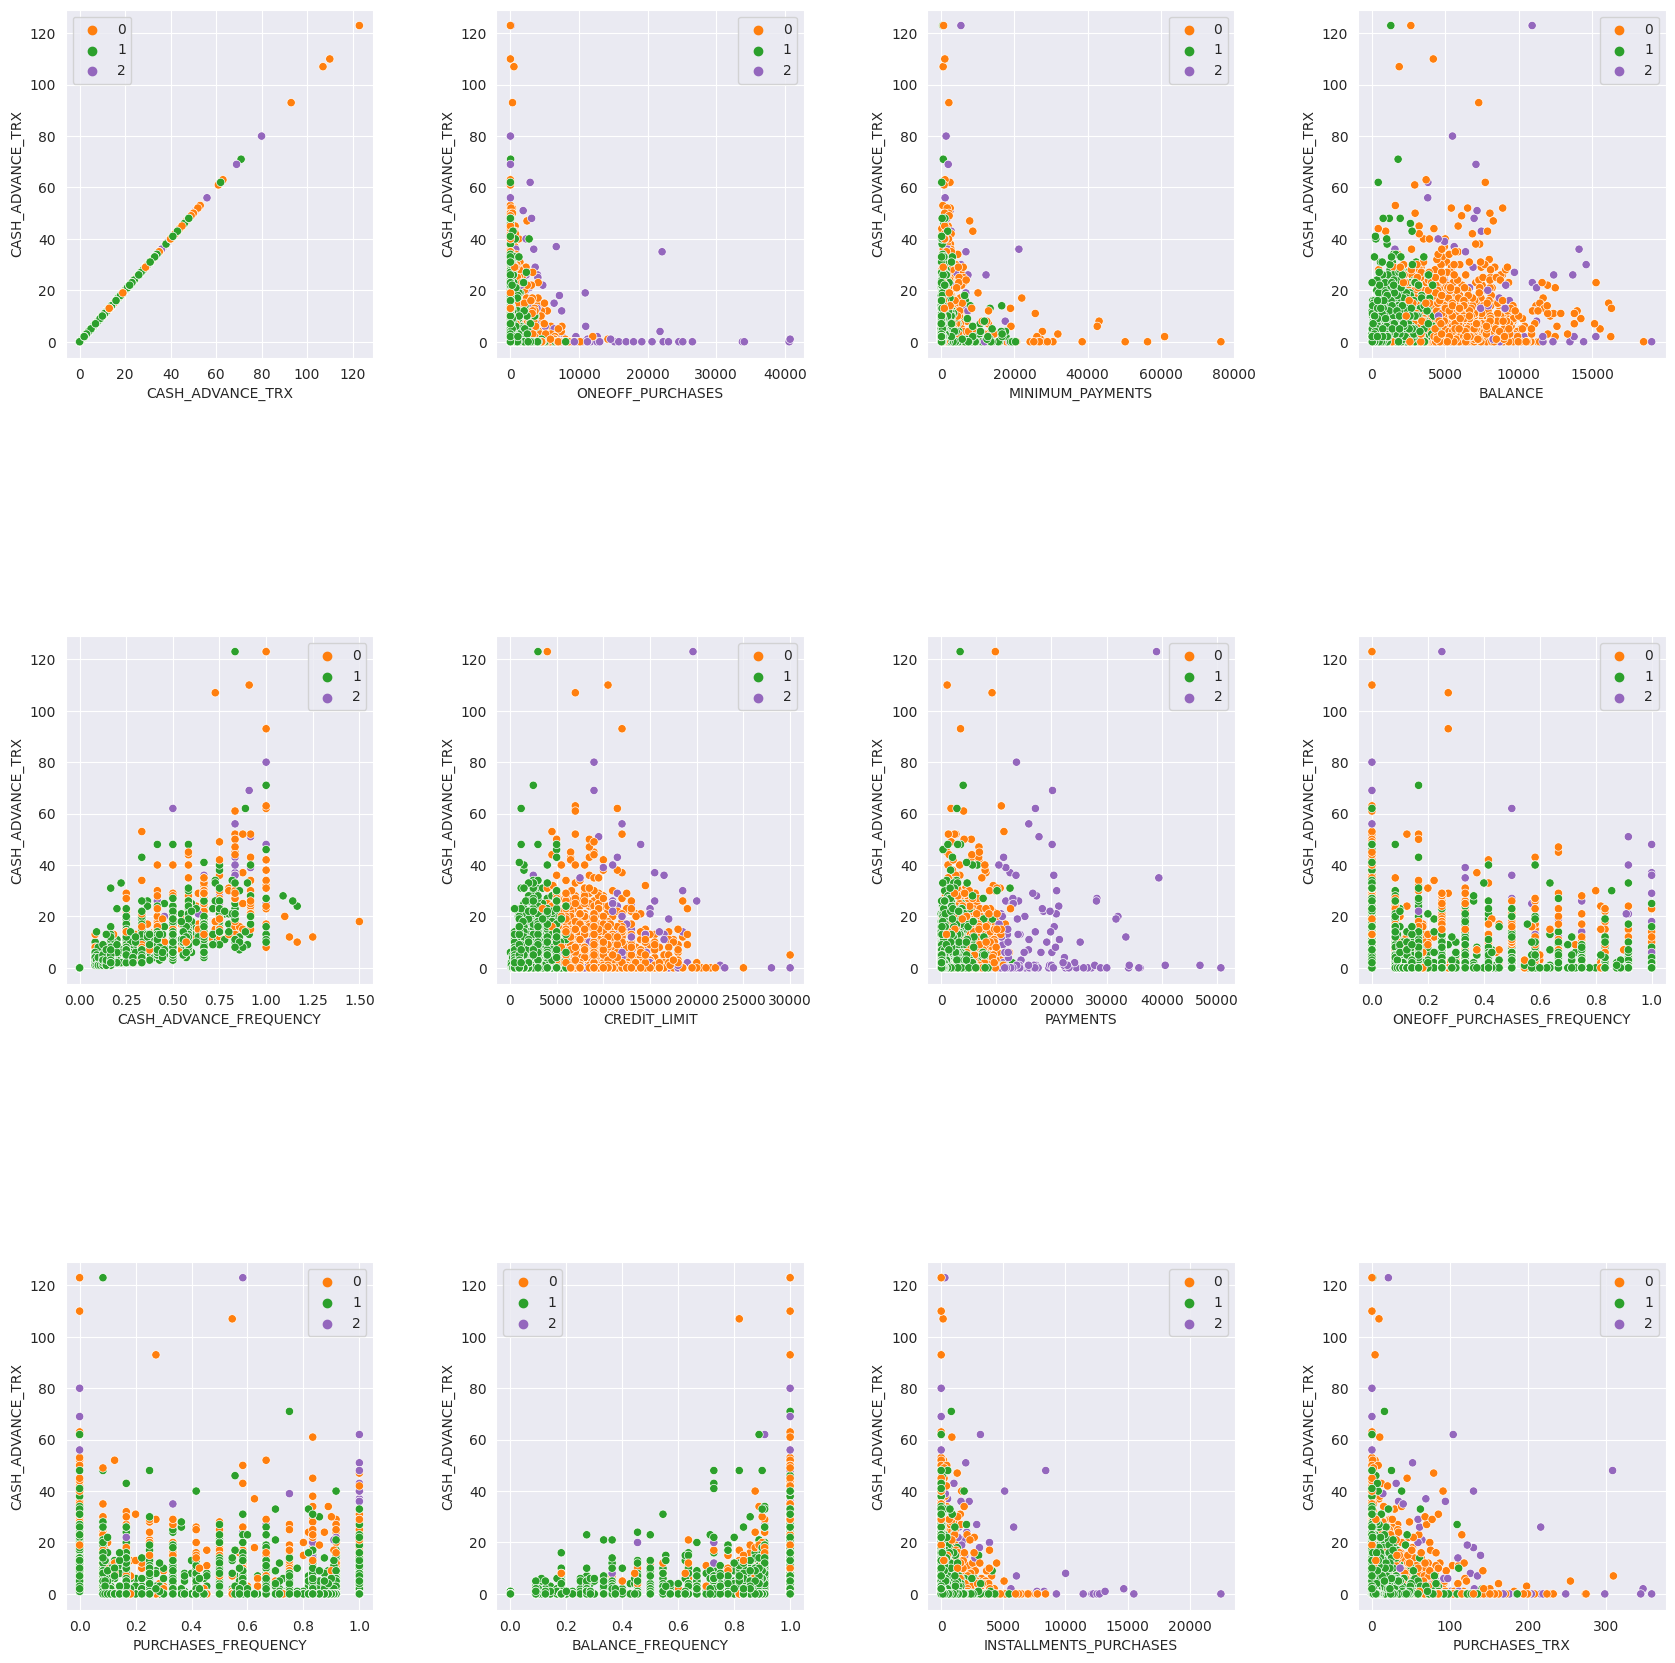

In [52]:
plt.subplots(nrows=3 , ncols=4 , figsize=(20,20))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

palette1=["#ff7f0e","#2ca02c","#9467bd"]

j=0 
for i in selected_input_columns:   
      
    plt.subplot(3,4,j+1)
    sns.scatterplot(x=i , y=selected_input_columns[0], hue=preds, data=X, palette=palette1)
    j=j+1